In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('./diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [11]:
x = df.drop('Outcome', axis=1).values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [18]:
neighbors,train_accuracy


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([8.85505823e-312, 8.85505675e-312, 8.85505677e-312, 8.85505675e-312,
        8.85505670e-312, 8.85505673e-312, 8.85505094e-312, 8.85505676e-312]))

In [20]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)

In [21]:
train_accuracy

array([1.        , 0.83913043, 0.82391304, 0.79565217, 0.79565217,
       0.7826087 , 0.7826087 , 0.78043478])

In [22]:
test_accuracy

array([0.71103896, 0.73376623, 0.69805195, 0.72077922, 0.70779221,
       0.72077922, 0.71428571, 0.72727273])

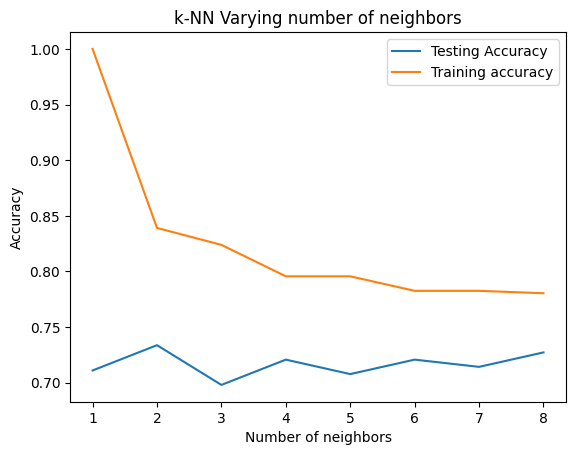

In [25]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

knn2 = KNeighborsClassifier(n_neighbors=14)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.7337662337662337

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[163,  43],
       [ 45,  57]], dtype=int64)

In [29]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,163,43,206
1,45,57,102
All,208,100,308


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



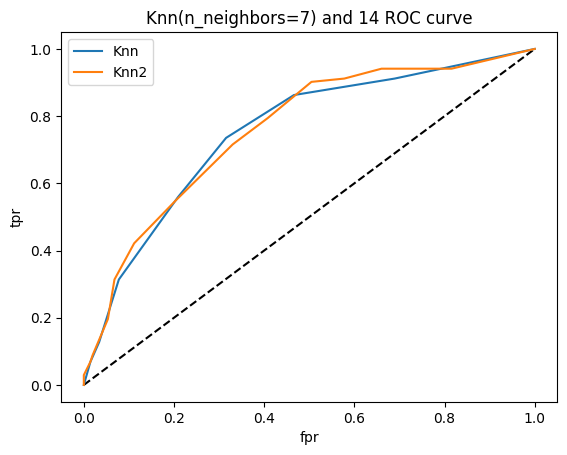

In [39]:
y_pred_proba  = knn.predict_proba(x_test)[:,1]
y_pred_proba2  = knn2.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
fpr ,tpr,thresholds = roc_curve(y_test,y_pred_proba)
fpr2 ,tpr2,thresholds2 = roc_curve(y_test,y_pred_proba2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Knn')
plt.plot(fpr2,tpr2,label='Knn2')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) and 14 ROC curve')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score   
roc_auc_score(y_test,y_pred_proba)

0.7536645726251665

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
knn_cv.best_params_

{'n_neighbors': 14}

In [35]:
knn_cv.best_score_

0.7578558696205755